In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input, Dropout
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
df = pd.read_csv('monthly_drinks_production.csv', index_col="Date", parse_dates=True)
df.index.freq="MS"

In [4]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

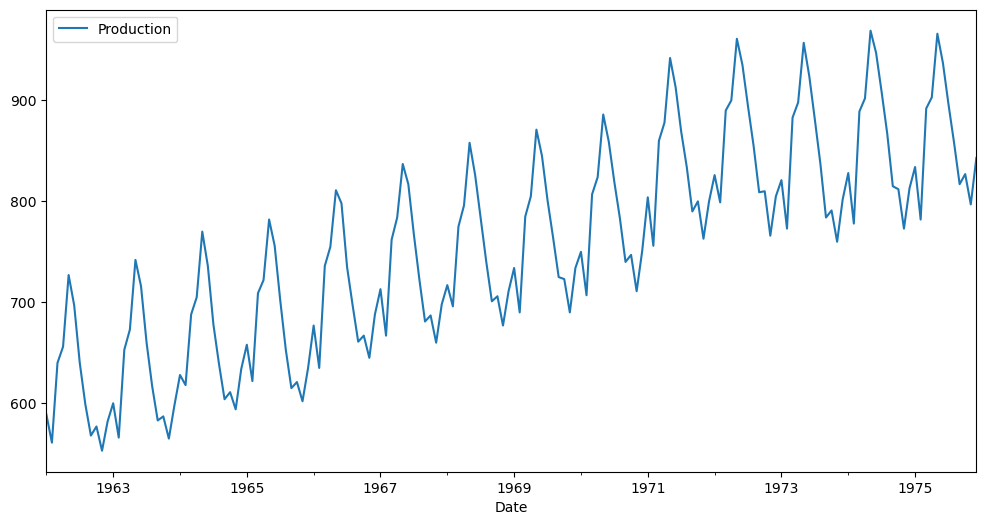

In [5]:
df.plot(figsize=(12,6))

### *Seasonal Decompose is a technique used to understand the components or features in a time series dataset.*

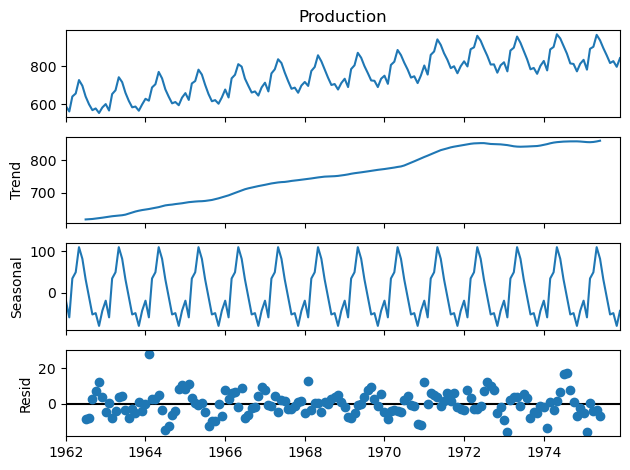

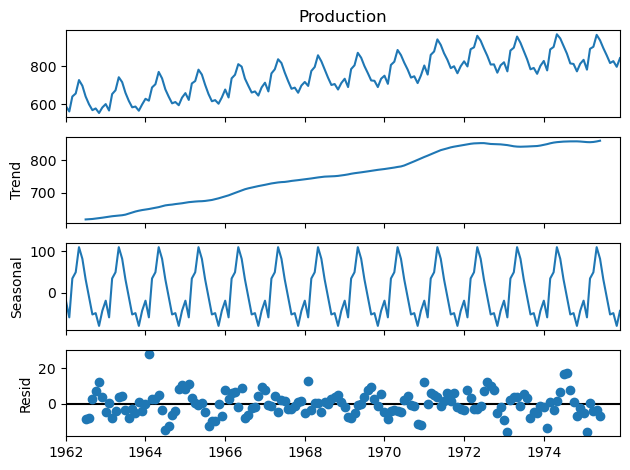

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df['Production'])
results.plot()

In [8]:
len(df)

168

In [9]:
train = df.iloc[:156]
test = df.iloc[156:]

In [10]:
len(test)

12

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [13]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

### Define the generator

In [15]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

### LSTM Model

In [17]:
model = Sequential()

model.add(Input(shape=(n_input, n_features)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(Dense(1))
model.compile(optimizer=Adam(),
              loss="mse",
             metrics=["mae"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 12, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 12, 20)         │         5,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12, 1)          │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,701 (299.61 KB)

 Trainable params: 76,701 (299.61 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(generator,epochs=50)

Epoch 1/50


F:\32.Anaconda\Setup\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1451 - mae: 0.3137
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0553 - mae: 0.1892
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0356 - mae: 0.1503
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0296 - mae: 0.1292
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0186 - mae: 0.0984
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0126 - mae: 0.0798
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0113 - mae: 0.0733
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0066 - mae: 0.0594
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0057 - mae: 0.0566
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0037 - mae: 0.0467
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0036 - mae: 0.0466
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0031 - mae: 0.0423
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━

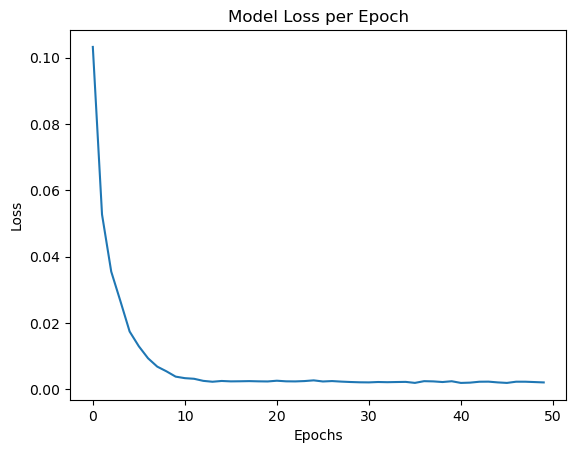

In [19]:
# Extract the loss values from the history
loss_per_epoch = history.history['loss']

plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.title('Model Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [20]:
last_train_batch = scaled_train[-12:]

last_train_batch = last_train_batch.reshape((1, n_input, n_features))

model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


array([[[0.67122793],
        [0.6677795 ],
        [0.6615755 ],
        [0.65785265],
        [0.6556165 ],
        [0.6527036 ],
        [0.64848816],
        [0.64357096],
        [0.63898695],
        [0.63378024],
        [0.6276808 ],
        [0.62050045]]], dtype=float32)

In [21]:
scaled_test[0]

array([0.67548077])

In [22]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the current batch
    current_pred = model.predict(current_batch)[0]
    
    # Check the shape of the prediction to understand its structure
    print(f"Shape of current_pred: {current_pred.shape}")
    
    # If the model predicts multiple values, select the first prediction
    if current_pred.ndim > 1:
        current_pred = current_pred[0]  # Adjust this based on what the prediction looks like
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # Reshape current_pred to match the shape of the batch (1, 1, n_features)
    current_pred_reshaped = np.reshape(current_pred, (1, 1, n_features))
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:, 1:, :], current_pred_reshaped, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Shape of current_pred: (12, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Shape of current_pred: (12, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Shape of current_pred: (12, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Shape of current_pred: (12, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Shape of current_pred: (12, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Shape of current_pred: (12, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Shape of current_pred: (12, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Shape of current_pred: (12, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Shape of current_pred: (12, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Shape of current_pred: (12, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Shape of current_pred: (12, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Shape of current_pred: (12, 1)


In [23]:
test_predictions

[array([0.67122793], dtype=float32),
 array([0.55793947], dtype=float32),
 array([0.8232467], dtype=float32),
 array([0.8557036], dtype=float32),
 array([1.03476], dtype=float32),
 array([0.9737379], dtype=float32),
 array([0.8710437], dtype=float32),
 array([0.76841706], dtype=float32),
 array([0.6403446], dtype=float32),
 array([0.63336426], dtype=float32),
 array([0.547399], dtype=float32),
 array([0.635685], dtype=float32)]

In [24]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [25]:
true_predictions = scaler.inverse_transform(test_predictions)

In [26]:
test.loc[:, 'Predictions'] = true_predictions

C:\Users\pallo\AppData\Local\Temp\ipykernel_7748\2879696197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'Predictions'] = true_predictions


In [27]:
print(test[['Production', 'Predictions']].head(10))

            Production  Predictions
Date                               
1975-01-01         834   832.230820
1975-02-01         782   785.102819
1975-03-01         892   895.470634
1975-04-01         903   908.972694
1975-05-01         966   983.460159
1975-06-01         937   958.074965
1975-07-01         896   915.354172
1975-08-01         858   872.661497
1975-09-01         817   819.383362
1975-10-01         827   816.479532


<Axes: xlabel='Date'>

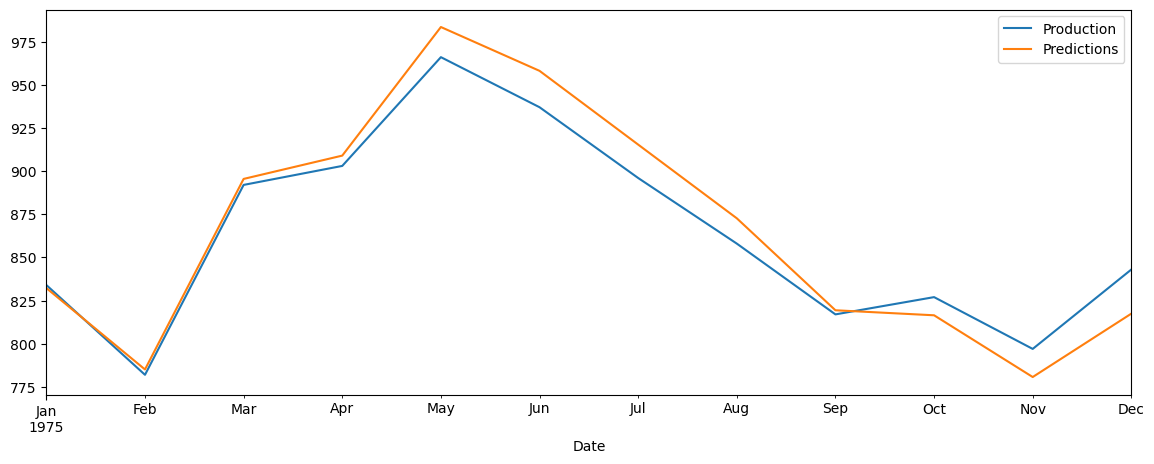

In [28]:
test.plot(figsize=(14,5))